In [1]:
import geoutils as gu
import numpy as np
import xdem
import os
import shutil
import xarray as xr
import rioxarray as rioxr
import geopandas as gpd
import matplotlib.pyplot as plt
import proplot as pplt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
pth_dxt='D:\\Key_works\\20231212dh_calculate\\dxt'
pth_srtm='D:\\Key_works\\20231212dh_calculate\\srtm'
pth_gla='D:\\Key_works\\20231212dh_calculate\\gla'

In [8]:
flst_dxt=[i for i in os.listdir(pth_dxt) if i[-4:]=='.tif']

In [9]:
flst_dxt

['g0001.tif',
 'g0002.tif',
 'g0003.tif',
 'g0004.tif',
 'g0005.tif',
 'g0006.tif',
 'g0007.tif',
 'g0008.tif',
 'g0011.tif',
 'g0015.tif',
 'g0016.tif',
 'g0017.tif',
 'g0018.tif',
 'g0020.tif',
 'g0021.tif',
 'g0022.tif',
 'g0023.tif',
 'g0024.tif',
 'g0025.tif',
 'g0026.tif',
 'g0027.tif',
 'g0028.tif',
 'g0029.tif',
 'g0030.tif',
 'g0031.tif',
 'g0032.tif',
 'g0033.tif',
 'g0034.tif',
 'g0035.tif',
 'g0038.tif',
 'g0039.tif',
 'g0040.tif',
 'g0041.tif',
 'g0043.tif',
 'g0044.tif',
 'g0045.tif',
 'g0046.tif',
 'g0047.tif',
 'g0048.tif',
 'g0049.tif',
 'g0050.tif',
 'g0051.tif',
 'g0052.tif',
 'g0053.tif',
 'g0054.tif',
 'g0055.tif',
 'g0056.tif',
 'g0057.tif',
 'g0058.tif',
 'g0059.tif',
 'g0060.tif',
 'g0061.tif',
 'g0062.tif',
 'g0063.tif',
 'g0064.tif',
 'g0065.tif',
 'g0066.tif',
 'g0067.tif',
 'g0068.tif',
 'g0069.tif',
 'g0070.tif',
 'g0071.tif',
 'g0072.tif',
 'g0073.tif',
 'g0074.tif',
 'g0075.tif',
 'g0076.tif',
 'g0077.tif',
 'g0078.tif',
 'g0079.tif',
 'g0080.tif',
 'g008

In [13]:
out_pth1='D:\\Key_works\\20231212dh_calculate\\results\\dh'
out_pth2='D:\\Key_works\\20231212dh_calculate\\results\\dh_coreg'
out_pth3='D:\\Key_works\\20231212dh_calculate\\results\\dxt_coreg'
f=open('D:\\Key_works\\20231212dh_calculate\\results\\sign.txt','w')
for nm in flst_dxt[:]:
    refer_dem = xdem.DEM(pth_srtm+'\\'+nm[:-4]+'_srtm.tif')
    tba_dem = xdem.DEM(pth_dxt+'\\'+nm)  ##dem to be aligned
    tba_dem.set_nodata(0)  ##地形图裁剪时，有些没数据的地方赋值成了0 这里提出
    
    refer_dem_prj = refer_dem.reproject(tba_dem)
    try:
        gla_outlines = gu.Vector(pth_gla+'\\CGI1\\'+nm[:-4]+'_gla.shp')
    except:
        f.write(nm[:-4]+' no glacier in CGI1\n')
        continue
    
    diff_bf =refer_dem_prj-tba_dem
    # Create a stable ground mask (not glacierized) to mark "inlier data"
    inlier_mask = ~gla_outlines.create_mask(refer_dem_prj)
    ########修正小的旋转和偏移
    deramp = xdem.coreg.Deramp(poly_order=2)
    deramp.fit(refer_dem_prj, tba_dem, inlier_mask=inlier_mask)
    corrected_dem = deramp.apply(tba_dem)
    
    ###分块校正
    blockwise = xdem.coreg.BlockwiseCoreg(xdem.coreg.NuthKaab(), subdivision=64)
    blockwise.fit(refer_dem_prj, corrected_dem, inlier_mask=inlier_mask)
    aligned_dem_bk = blockwise.apply(corrected_dem)

    
    diff_af =refer_dem_prj-aligned_dem_bk
    diff_bf.save(out_pth1+'\\'+nm[:-4]+'_dh.tif')
    diff_af.save(out_pth2+'\\'+nm[:-4]+'_dh_coreg.tif')
    aligned_dem_bk.save(out_pth3+'\\'+nm[:-4]+'_coreg.tif')
    print(nm[:-4],' done!')
    #break
f.close()
    #break

g0001  done!
g0002  done!
g0003  done!
g0004  done!
g0005  done!
g0006  done!
g0007  done!
g0008  done!
g0011  done!
g0015  done!
g0016  done!
g0017  done!
g0018  done!
g0020  done!
g0021  done!
g0022  done!
g0023  done!
g0024  done!
g0025  done!
g0026  done!
g0027  done!
g0028  done!
g0029  done!
g0030  done!
g0031  done!
g0032  done!
g0033  done!
g0034  done!
g0035  done!
g0038  done!
g0039  done!
g0040  done!
g0041  done!
g0043  done!
g0044  done!
g0045  done!
g0046  done!
g0047  done!
g0048  done!
g0049  done!
g0050  done!
g0051  done!
g0052  done!
g0053  done!
g0054  done!
g0055  done!
g0056  done!
g0057  done!
g0058  done!
g0059  done!
g0060  done!
g0061  done!
g0062  done!
g0063  done!
g0064  done!
g0065  done!
g0066  done!
g0067  done!
g0068  done!
g0069  done!
g0070  done!
g0071  done!
g0072  done!
g0073  done!
g0074  done!
g0075  done!
g0076  done!
g0077  done!
g0078  done!
g0079  done!
g0080  done!
g0081  done!
g0082  done!
g0083  done!
g0084  done!
g0085  done!
g0086  done!

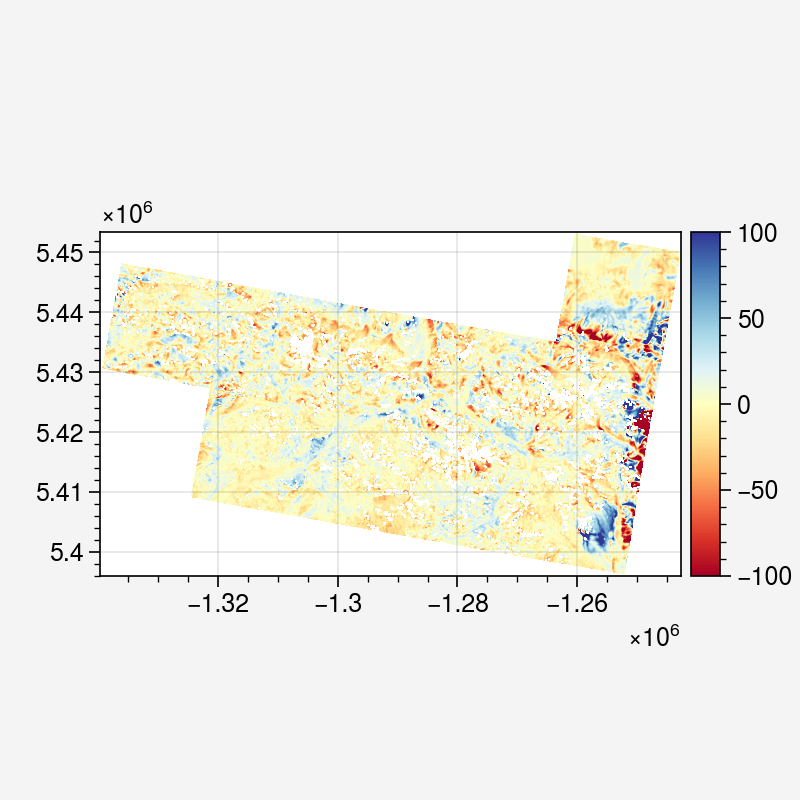

In [14]:
diff_af.show(cmap="rdylbu", vmin=-100, vmax=100)

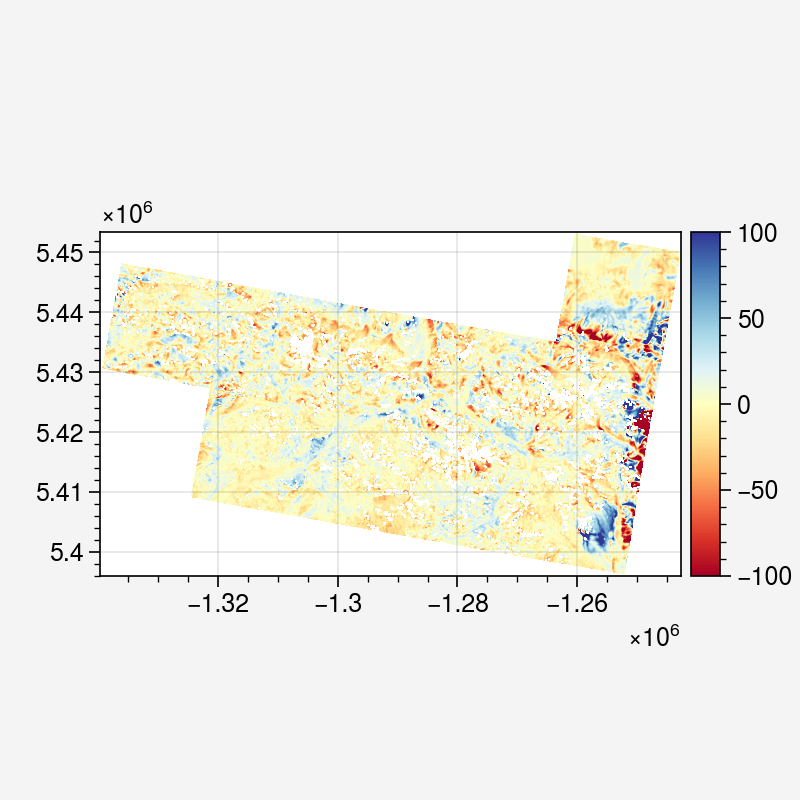

In [15]:
(refer_dem_prj-aligned_dem_bk).show(cmap="rdylbu", vmin=-100, vmax=100)

In [14]:
flst_dxt[191:]

['g0203.tif',
 'g0204.tif',
 'g0205.tif',
 'g0206.tif',
 'g0207.tif',
 'g0208.tif',
 'g0209.tif',
 'g0210.tif',
 'g0211.tif',
 'g0212.tif',
 'g0213.tif',
 'g0214.tif',
 'g0215.tif',
 'g0216.tif',
 'g0217.tif',
 'g0218.tif',
 'g0219.tif',
 'g0220.tif',
 'g0221.tif',
 'g0222.tif',
 'g0223.tif',
 'g0224.tif',
 'g0225.tif',
 'g0226.tif',
 'g0227.tif',
 'g0228.tif',
 'g0229.tif',
 'g0230.tif',
 'g0231.tif',
 'g0232.tif',
 'g0233.tif',
 'g0234.tif',
 'g0235.tif',
 'g0236.tif',
 'g0237.tif',
 'g0238.tif',
 'g0239.tif',
 'g0240.tif',
 'g0241.tif',
 'g0242.tif',
 'g0243.tif',
 'g0244.tif',
 'g0245.tif',
 'g0246.tif',
 'g0247.tif',
 'g0248.tif',
 'g0249.tif',
 'g0250.tif',
 'g0251.tif',
 'g0252.tif',
 'g0253.tif',
 'g0254.tif',
 'g0255.tif',
 'g0256.tif',
 'g0257.tif',
 'g0258.tif',
 'g0259.tif',
 'g0260.tif',
 'g0261.tif',
 'g0262.tif',
 'g0263.tif',
 'g0264.tif',
 'g0265.tif',
 'g0266.tif',
 'g0267.tif',
 'g0268.tif',
 'g0269.tif',
 'g0270.tif',
 'g0271.tif',
 'g0272.tif',
 'g0273.tif',
 'g027